In [57]:
import pandas as pd

# Load PNU table

In [58]:
df_pnu = pd.read_csv("DSMZ_bactnames.csv", sep="\t")

In [59]:
df_pnu

,GENUS,SPECIES,SUBSPECIES,REFERENCE,STATUS,AUTHORS,REMARKS,RISK_GRP,TYPE_STRAINS,RECORD_NO,RECORD_LNK
0,Abditibacterium,utsteinense,NaN,68:3379,sp. nov. (VL),Tahon et al. 2018,NaN,NaN,"DSM 105287, LMG 29911, R-68213",797965,NaN
1,Abditibacterium,NaN,NaN,68:3379,gen. nov. (VL),Tahon et al. 2018,NaN,NaN,NaN,520424,NaN
2,Abiotrophia,adiacens,NaN,45:798*,"comb. nov. (VP), homotypic syn.",(Bouvet et al. 1989) Kawamura et al. 1995,NaN,2,"ATCC 49175, CIP 103243, DSM 9848, GaD, CCUG 27...",772466,776611.0
3,Abiotrophia,balaenopterae,NaN,49:503*,sp. nov. (VP),Lawson et al. 1999,NaN,NaN,"CCUG 37380, M1975/96/1, DSM 15827, ATCC 700813...",772467,776612.0
4,Abiotrophia,defectiva,NaN,45:798*,comb. nov. (VP),(Bouvet et al. 1989) Kawamura et al. 1995,NaN,2,"ATCC 49176, CIP 103242, DSM 9849, SC10, CCUG 2...",772468,NaN
5,Abiotrophia,elegans,NaN,49:1,sp. nov. (VL),Roggenkamp et al. 1999,NaN,2,"B1333, DSM 11693, ATCC 700633, CCUG 38949, CIP...",772469,776613.0
6,Abiotrophia,NaN,NaN,45:798*,gen. nov. (VP),Kawamura et al. 1995,NaN,NaN,NaN,514986,NaN
7,Abyssibacter,profundi,NaN,68:3424*,sp. nov. (VP),Zhou et al. 2018,NaN,NaN,"KCTC 52933, MCCC 1K03450, OUC007",797925,NaN
8,Abyssibacter,NaN,NaN,68:3424*,gen. nov. (VP),Zhou et al. 2018,NaN,NaN,NaN,520421,NaN
9,Abyssicoccus,albus,NaN,66:4299,sp. nov. (VL),Jiang et al. 2016,NaN,NaN,"YIM M12140, DSM 29158, CCTCC AB 2014213",794216,NaN


In [66]:
import re

def get_year(author):
    year_list = re.findall(r'\d\d\d\d', author)
    first_year = int(year_list[0])
    return(first_year)


In [67]:
df_pnu["YEAR"] = df_pnu["AUTHORS"].apply(get_year)


# Count species without synonyms

In [46]:
df_species = df_pnu[(pd.notna(df_pnu["SPECIES"])) & 
           (pd.isna(df_pnu["SUBSPECIES"])) & 
           (pd.isna(df_pnu["RECORD_LNK"]))]

In [47]:
count_species = pd.DataFrame(df_species["YEAR"].value_counts()).reset_index()
count_species.columns = ["YEAR", "FREQ"]
count_species.sort_values(by="YEAR", inplace=True)
count_species["CUMSUM"] = count_species["FREQ"].cumsum()
count_species

,YEAR,FREQ,CUMSUM
164,1786,1,1
156,1797,1,2
165,1803,1,3
163,1809,1,4
160,1812,1,5
162,1823,1,6
146,1832,2,8
158,1833,1,9
145,1835,2,11
131,1838,4,15


In [48]:
count_species_1919_2019 = count_species[(count_species["YEAR"] > 1917) & (count_species["YEAR"] < 2020)]

In [49]:
count_species_1919_2019

,YEAR,FREQ,CUMSUM
134,1918,4,365
71,1919,17,382
108,1920,8,390
111,1921,7,397
98,1922,10,407
81,1923,15,422
96,1924,11,433
118,1925,6,439
75,1926,17,456
92,1927,11,467


# Genus without synonyms

In [50]:
df_genus = df_pnu[(pd.notna(df_pnu["GENUS"])) &
                  (pd.isna(df_pnu["SPECIES"])) &
                  (pd.isna(df_pnu["SUBSPECIES"])) & 
                  (pd.isna(df_pnu["RECORD_LNK"]))]
df_genus

,GENUS,SPECIES,SUBSPECIES,REFERENCE,STATUS,AUTHORS,REMARKS,RISK_GRP,TYPE_STRAINS,RECORD_NO,RECORD_LNK,YEAR
1,Abditibacterium,NaN,NaN,68:3379,gen. nov. (VL),Tahon et al. 2018,NaN,NaN,NaN,520424,NaN,2018
6,Abiotrophia,NaN,NaN,45:798*,gen. nov. (VP),Kawamura et al. 1995,NaN,NaN,NaN,514986,NaN,1995
8,Abyssibacter,NaN,NaN,68:3424*,gen. nov. (VP),Zhou et al. 2018,NaN,NaN,NaN,520421,NaN,2018
10,Abyssicoccus,NaN,NaN,66:4299,gen. nov. (VL),Jiang et al. 2016,NaN,NaN,NaN,518960,NaN,2016
12,Abyssivirga,NaN,NaN,66:1724*,gen. nov. (VP),Schouw et al. 2016,NaN,NaN,NaN,518931,NaN,2016
14,Acanthopleuribacter,NaN,NaN,58:2597*,gen. nov. (VP),Fukunaga et al. 2008,NaN,NaN,NaN,517824,NaN,2008
16,Acaricomes,NaN,NaN,56:465*,gen. nov. (VP),Pukall et al. 2006,NaN,NaN,NaN,514988,NaN,2006
17,Accumulibacter,NaN,NaN,22:454,gen. nov. (NVP),Hesselmann et al. 1999,NaN,NaN,NaN,521754,NaN,1999
19,Acetanaerobacterium,NaN,NaN,54:2257*,gen. nov. (VP),Chen and Dong 2004,NaN,NaN,NaN,517160,NaN,2004
21,Acetatifactor,NaN,NaN,63:1,gen. nov. (VL),Pfeiffer et al. 2013,[DSMZ] belongs to the <i>Clostridium</i> clust...,NaN,NaN,518267,NaN,2013


In [51]:
count_genus = pd.DataFrame(df_genus["YEAR"].value_counts()).reset_index()
count_genus.columns = ["YEAR", "FREQ"]
count_genus.sort_values(by="YEAR", inplace=True)
count_genus["CUMSUM"] = count_genus["FREQ"].cumsum()
count_genus_1919_2019 = count_genus[(count_genus["YEAR"] > 1917) & (count_genus["YEAR"] < 2020)]
count_genus_1919_2019

,YEAR,FREQ,CUMSUM
65,1919,4,92
91,1920,2,94
89,1922,2,96
54,1923,5,101
45,1924,7,108
90,1925,2,110
130,1928,1,111
63,1929,4,115
121,1931,1,116
140,1932,1,117


# Subspecies without synonyms

In [52]:
df_subspecies = df_pnu[(pd.notna(df_pnu["GENUS"])) &
                  (pd.notna(df_pnu["SPECIES"])) &
                  (pd.notna(df_pnu["SUBSPECIES"])) & 
                  (pd.isna(df_pnu["RECORD_LNK"]))]
df_subspecies

,GENUS,SPECIES,SUBSPECIES,REFERENCE,STATUS,AUTHORS,REMARKS,RISK_GRP,TYPE_STRAINS,RECORD_NO,RECORD_LNK,YEAR
375,Actinobacillus,equuli,haemolyticus,52:1569*,subsp. nov. (VP),Christensen et al. 2002,NaN,"2, t","CCUG 19799, F 154, NCTC 13195, DSM 22436",783279,NaN,2002
703,Actinosynnema,pretiosum,auranticum,33:314*,subsp. nov. (VP),Hasegawa et al. 1983,NaN,1,"ATCC 31309, C-14482(N-1001), DSM 44131, FERM-P...",772866,NaN,1983
732,Adlercreutzia,equolifaciens,celatus,68:3379,comb. nov. (VL),(Minamida et al. 2008) Nouioui et al. 2018,NaN,1,"AHU 1763, do03, DSM 18785, JCM 14811",798322,NaN,2008
742,Advenella,kashmirensis,methylica,67:1,subsp. nov. (VL),Shmareva et al. 2017,[IJSEM] The etymology must be adjusted as foll...,NaN,"PK1, DSM 27514, VKM B-2850",794996,NaN,2017
809,Aeromonas,hydrophila,ranae,53:885*,subsp. nov. (VP),Huys et al. 2003,NaN,"2, t","Au-1D12, CCUG 46211, LMG 19707, DSM 17695",772905,NaN,2003
823,Aeromonas,salmonicida,achromogenes,30:225,comb. nov. (AL),(Smith 1963) Schubert 1967,NaN,"1, t2","NCMB 1110, DSM 21281, ATCC 33659, CIP 104001, ...",783329,NaN,1963
824,Aeromonas,salmonicida,masoucida,30:225,subspecies (AL),Kimura 1969,NaN,"1, t2","ATCC 27013, DSM 21760, CIP 103210, IFO 13784, ...",783330,NaN,1969
825,Aeromonas,salmonicida,pectinolytica,50:1119*,subsp. nov. (VP),Pavan et al. 2000,NaN,1,"34mel, DSM 12609, CCUG 44929, CIP 107036, stra...",772914,NaN,2000
827,Aeromonas,salmonicida,smithia,39:495,subsp. nov. (VL),Austin et al. 1989,NaN,"1, t2","138, CCM 4103, DSM 21293, ATCC 49393, CIP 104757",783332,NaN,1989
961,Agromyces,cerinus,nitratus,42:635*,subsp. nov. (VP),Zgurskaya et al. 1992,NaN,1,"DSM 8596, VKM Ac-1351, ATCC 51763, CIP 103634,...",772983,NaN,1992


In [53]:
count_subspecies = pd.DataFrame(df_subspecies["YEAR"].value_counts()).reset_index()
count_subspecies.columns = ["YEAR", "FREQ"]
count_subspecies.sort_values(by="YEAR", inplace=True)
count_subspecies["CUMSUM"] = count_subspecies["FREQ"].cumsum()
count_subspecies_1919_2019 = count_subspecies[(count_subspecies["YEAR"] > 1917) & (count_subspecies["YEAR"] < 2020)]

# Plot

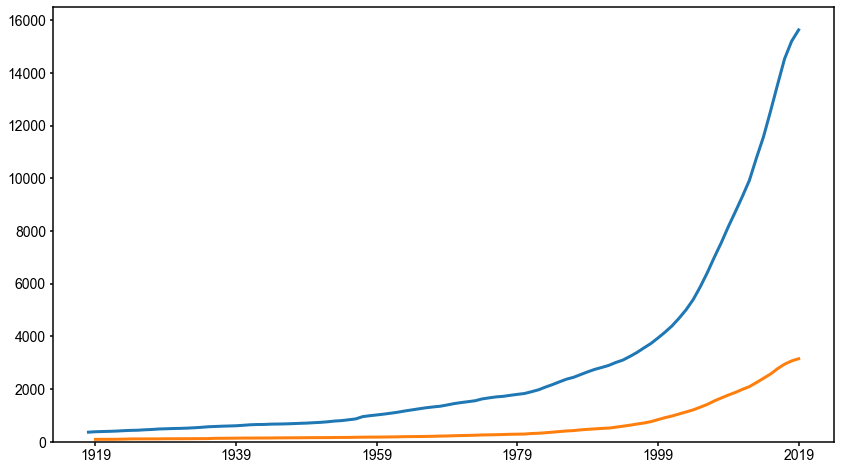

In [54]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from matplotlib import rcParams
import numpy as np

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

fig, ax = plt.subplots(figsize=(14,8))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#ax.set_yscale('symlog')

plt.ylim(0,16500)

dim=np.arange(1919,2020,20)
plt.xticks(dim)

plt.plot(count_species_1919_2019["YEAR"], count_species_1919_2019["CUMSUM"], linewidth=3)
#plt.plot(count_subspecies_1918_2018["YEAR"], count_subspecies_1918_2018["CUMSUM"], linewidth=3)
plt.plot(count_genus_1919_2019["YEAR"], count_genus_1919_2019["CUMSUM"], linewidth=3)

#fig.savefig("dsmz_PNU.svg")
plt.show()